### mobilenet_v2 모델 다운로드 후 예측해보기
- 이미 학습된 가중치가 있는 모델을 가지고 예측해보기

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# !pip install -U tf-hub-nightly

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   --------------- ------------------------ 0.7/1.7 MB 13.9 MB/s eta 0:00:01
   ----------------------- ---------------- 1.0/1.7 MB 10.7 MB/s eta 0:00:01
   ---------------------------------------  1.7/1.7 MB 9.1 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 7.8 MB/s eta 0:00:00


In [2]:
import tensorflow_hub as hub
from tensorflow.keras import layers

### 텐서플로 허브에서 mobilenet 가져오기

In [3]:
url = 'http://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/2'
classifier_url = url

In [4]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer(classifier_url, input_shape = IMAGE_SHAPE+(3,))
])

In [5]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              3540265   
                                                                 
Total params: 3540265 (13.51 MB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 3540265 (13.51 MB)
_________________________________________________________________


61306/61306 [==============================] - 0s 0us/step


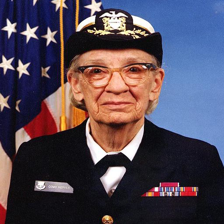

In [7]:
import numpy as np
import PIL.Image as Image

url = 'http://storage.googleapis.com/download.tensorflow.org/example_images/grace_hopper.jpg'
grace_hopper = tf.keras.utils.get_file('image.jpg', url)
grace_hopper = Image.open(grace_hopper).resize(IMAGE_SHAPE)
grace_hopper

### 정규화 및 예측

In [48]:
np.array(grace_hopper)

array([[[0.09803922, 0.10980392, 0.32156863],
        [0.11372549, 0.12156863, 0.35686275],
        [0.10588235, 0.10980392, 0.37254902],
        ...,
        [0.28627451, 0.43529412, 0.7254902 ],
        [0.27058824, 0.41960784, 0.71372549],
        [0.2745098 , 0.42352941, 0.71764706]],

       [[0.10980392, 0.12156863, 0.33333333],
        [0.10588235, 0.11372549, 0.35294118],
        [0.10588235, 0.10980392, 0.36862745],
        ...,
        [0.30196078, 0.44705882, 0.73333333],
        [0.31764706, 0.4627451 , 0.74901961],
        [0.31372549, 0.45882353, 0.74509804]],

       [[0.10588235, 0.11764706, 0.32941176],
        [0.10980392, 0.11764706, 0.35294118],
        [0.11764706, 0.12156863, 0.38039216],
        ...,
        [0.33333333, 0.4745098 , 0.75294118],
        [0.31372549, 0.45882353, 0.7372549 ],
        [0.3254902 , 0.47058824, 0.74901961]],

       ...,

       [[0.62745098, 0.03921569, 0.09019608],
        [0.63137255, 0.05490196, 0.09411765],
        [0.59215686, 0

In [8]:
grace_hopper = np.array(grace_hopper) / 255.0
grace_hopper.shape

(224, 224, 3)

### [np.newaxis, ...]
- NumPy 배열에서 차원을 추가하는데 사용되는 표현오르 배열의 앞쪽에 새로운 차원을 추가하는 것을 의미
- 여기서 [np.newaxis]는 배열의 첫 번째 차원을 추가하는데 사용되는 NumPy의 인덱스 표현
- np.newaxis는 None과 동일한 역할을 합니다. 따라서 np.newaxis를 배열의 인덱스로 사용하면 해당 위치에 차원이 추가
- ...은 NumPy의 슬라이싱(slicing) 표현으로서, 배열의 나머지 차원을 표현
- 따라서 [np.newaxis, ...]는 배열의 앞쪽에 새로운 차원을 추가하고, 나머지 차원은 그대로 유지하는 것을 의미

In [47]:
# 1차원 배열 생성
arr = np.array([1, 2, 3, 4, 5])

# 새로운 차원 추가하여 2차원 배열 생성
arr_2d = arr[np.newaxis, ...]

print(arr_2d)

[[1 2 3 4 5]]


In [10]:
result = classifier.predict(grace_hopper[np.newaxis, ...])
result.shape

1/1 [==============================] - 0s 159ms/step


(1, 1001)

### argmax로 인덱스를 찾고 label로 받은 후 확인
- argmax로 인덱스 찾기 : 배열(array)에서 최대값(maximum value)을 가지는 요소의 인덱스(index)를 반환
- 배열에서 가장 큰 값을 가지는 요소의 위치를 찾는 기능

In [11]:
# argmax로 인덱스 찾기
# mobilenet_v2은 1000개의 class를 가지고 있고 이중에 텐서플로 허브에서 가져온 class는 653이다
predicted_class = np.argmax(result[0], axis = -1)
predicted_class

653

In [14]:
# label 받기
url = 'http://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt'
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt', url)
imagenet_lables = np.array(open(labels_path).read().splitlines())

10484/10484 [==============================] - 0s 0us/step


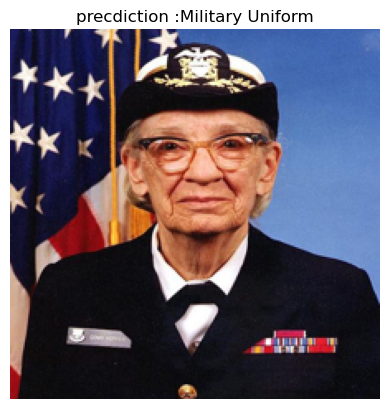

In [16]:
plt.imshow(grace_hopper)
plt.axis('off')
predicted_class_name = imagenet_lables[predicted_class]
_ = plt.title('precdiction :' + predicted_class_name.title())

### 다른 파일로 예측해보기

In [17]:
url = 'http://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'
data_root = tf.keras.utils.get_file(
    'flower_photos', url,
    untar=True # untar=True : 압축을 푸는 설정
)

228813984/228813984 [==============================] - 18s 0us/step


### rescale 및 라벨 인식
### ImageDataGenerator
- 이미지 데이터를 효율적으로 증강(augmentation)하고(=이미지를 회전, 이동, 확대/축소, 뒤집기 등의 변환을 적용하여 새로운 이미지를 생성) 
- 데이터를 로드하기 위한 유틸리티 클래스로 주로 딥러닝 모델을 훈련할 때 이미지 데이터셋을 처리하는 데 사용
### flow_from_directory
- 디렉토리에서 이미지를 읽어와서 데이터를 생성하는 메서드로 딥러닝 모델을 훈련할 때 사용되는 데이터셋을 구성하는 데 유용
- 주로 ImageDataGenerator와 함께 사용되며, 디스크에서 이미지 데이터를 실시간으로 로드하여 모델에 전달 가능

In [18]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
image_data = image_generator.flow_from_directory(str(data_root), target_size=IMAGE_SHAPE)

Found 3670 images belonging to 5 classes.


- 여기서 받은 데이터는 3670개의 이미지가 있고 5개의 class가 있다

### image_batch 생성

In [44]:
for image_batch, label_batch in image_data:
    print("Image batch shape :", image_batch.shape)
    print("Lable batch shape :", label_batch.shape)
    break

Image batch shape : (32, 224, 224, 3)
Lable batch shape : (32, 5)


### batch한 셋에 대한 imagenet을 기준으로 학습한 모델로 예측
- classifier = mobilenet_v2

In [20]:
result_batch = classifier.predict(image_batch)
result_batch.shape

1/1 [==============================] - 0s 284ms/step


(32, 1001)

In [21]:
predicted_class_names = imagenet_lables[np.argmax(result_batch, axis=-1)]
predicted_class_names

array(['picket fence', 'daisy', "jack-o'-lantern", 'rapeseed',
       'handkerchief', 'daisy', 'park bench', 'daisy', 'sea urchin',
       'mantis', 'trailer truck', 'daisy', 'acorn', 'mushroom',
       'picket fence', 'sea urchin', 'ant', 'daisy', 'wool',
       "yellow lady's slipper", 'hummingbird', 'daisy', 'sea urchin',
       'daisy', 'daisy', "yellow lady's slipper", 'daisy', 'pot', 'tray',
       'sea urchin', 'daisy', 'maze'], dtype='<U30')

### 시각화 확인

In [22]:
len(predicted_class_names)

32

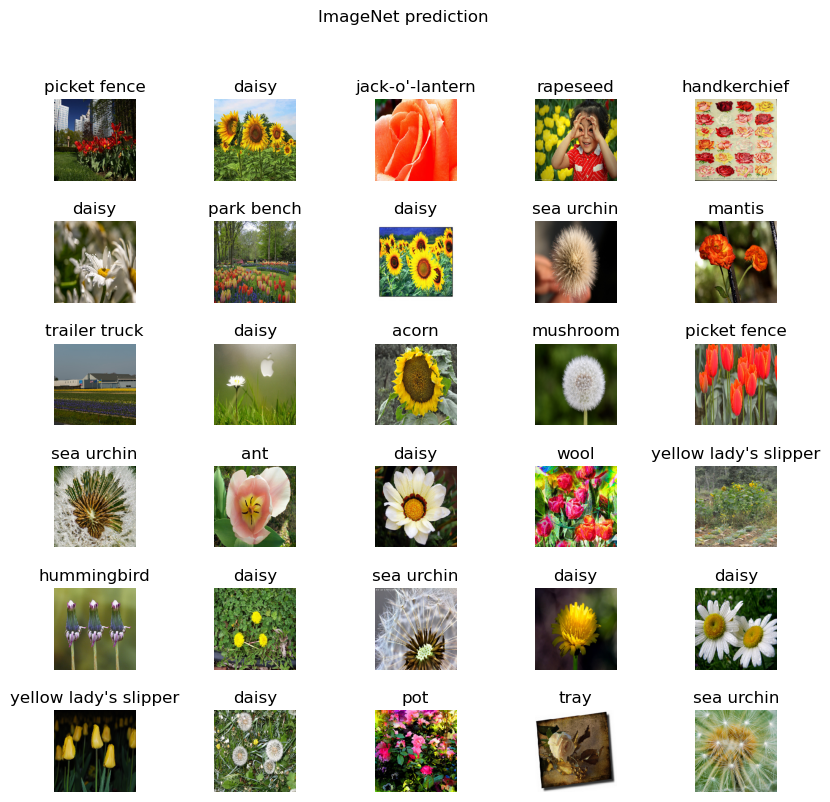

In [23]:
plt.figure(figsize=(10, 9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
    plt.subplot(6, 5, n+1)
    plt.imshow(image_batch[n])
    plt.title(predicted_class_names[n])
    plt.axis('off')
_ = plt.suptitle('ImageNet prediction')

### 다시 특징 추출기

In [24]:
feature_extractor_url = 'http://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/2'
feature_extractor_layer = hub.KerasLayer(feature_extractor_url,
                                         input_shape=(224, 224, 3))

In [25]:
feature_batch = feature_extractor_layer(image_batch)
print(feature_batch.shape)

(32, 1280)


### dense layer 추가

In [26]:
feature_extractor_layer.trainable = False

model = tf.keras.Sequential([
    feature_extractor_layer,
    layers.Dense(image_data.num_classes, activation = 'softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2264389 (8.64 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


### 마지막 layer

In [28]:
predictions = model(image_batch)
predictions.shape

TensorShape([32, 5])

### compile

In [30]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = 'categorical_crossentropy',
    metrics = ['acc']
)

### callback 한개 정의
- loss와 acc를 batch 별로 뽑아내는 기능

In [36]:
class CollectBatchState(tf.keras.callbacks.Callback):
    def __init__(self):
        self.batch_losses = []
        self.batch_acc = []

    def on_train_batch_end(self, batch, logs=None):
        self.batch_losses.append(logs['loss'])
        self.batch_acc.append(logs['acc'])
        self.model.reset_metrics()

### 학습

In [37]:
steps_per_epoch = np.ceil(image_data.samples/image_data.batch_size)

batch_stats_callback = CollectBatchState()

history = model.fit_generator(image_data, epochs=2,
                              steps_per_epoch = steps_per_epoch,
                              callbacks=[batch_stats_callback])

C:\Users\user\AppData\Local\Temp\ipykernel_15700\231254757.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(image_data, epochs=2,


Epoch 1/2
115/115 [==============================] - 278s 2s/step - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 2/2
115/115 [==============================] - 147s 1s/step - loss: 0.0000e+00 - acc: 0.0000e+00


### loss 확인
- loss는 점점 떨어진다

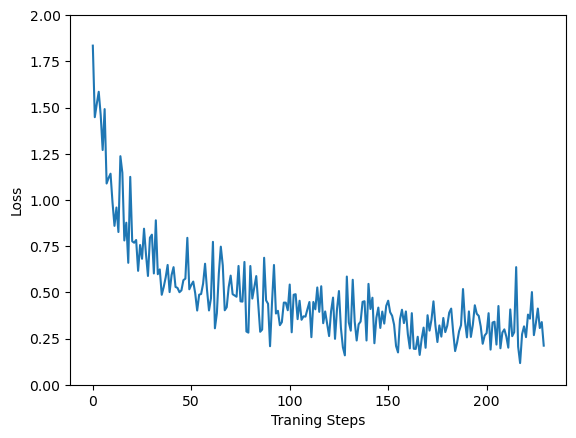

In [39]:
plt.figure()
plt.ylabel('Loss')
plt.xlabel('Traning Steps')
plt.ylim([0, 2])
plt.plot(batch_stats_callback.batch_losses)

### acc 확인
- acc는 점점 좋아진다

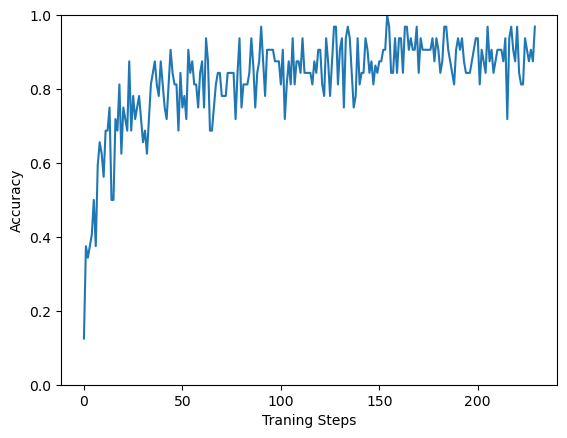

In [40]:
plt.figure()
plt.ylabel('Accuracy')
plt.xlabel('Traning Steps')
plt.ylim([0, 1])
plt.plot(batch_stats_callback.batch_acc)

### class name 할당

In [41]:
class_names = sorted(image_data.class_indices.items(), key=lambda pair:pair[1])
class_names = np.array([key.title() for key, value in class_names])
class_names

array(['Daisy', 'Dandelion', 'Roses', 'Sunflowers', 'Tulips'],
      dtype='<U10')

### 다시 예측

In [45]:
predicted_batch = model.predict(image_batch)
predicted_id = np.argmax(predicted_batch, axis=-1)
predicted_label_batch = class_names[predicted_id]

label_id = np.argmax(label_batch, axis=-1)

1/1 [==============================] - 1s 712ms/step


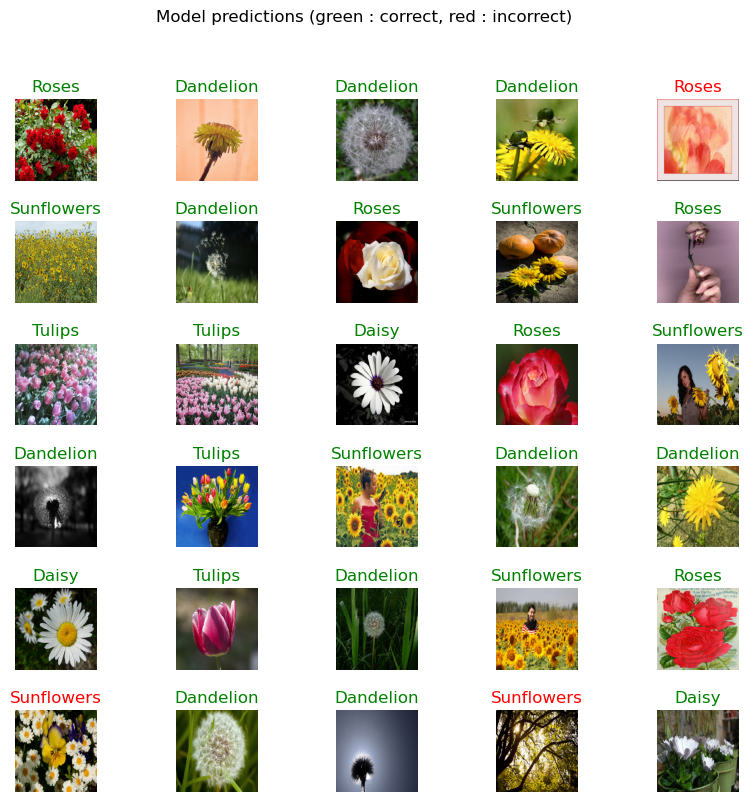

In [46]:
plt.figure(figsize=(10, 9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
    plt.subplot(6, 5, n+1)
    plt.imshow(image_batch[n])
    color = 'green' if predicted_id[n] == label_id[n] else 'red'
    plt.title(predicted_label_batch[n].title(), color = color)
    plt.axis('off')
_ = plt.suptitle('Model predictions (green : correct, red : incorrect)')

In [49]:
import time

t = time.time()

export_path = './{}'.format(int(t))
model.save(export_path, save_format='tf')

export_path

INFO:tensorflow:Assets written to: ./1707304275\assets


INFO:tensorflow:Assets written to: ./1707304275\assets


'./1707304275'